In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [149]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [150]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_few_shots.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_few_shots.csv False 300


In [151]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   internlm/internlm2_5-7b-chat/shots-00               1133 non-null   object
 8   internlm/internlm2_5-7b-chat/shots-01               1133 non-null   object
 9   internlm

In [152]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [153]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "shots" in col]
openai_cols

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-01',
 'gpt-4o-mini/shots-03',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-01',
 'gpt-4o/shots-03',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-50']

In [154]:
result_columns = df.columns[2:].to_list()
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/shots-00',
 'Qwen/Qwen2-72B-Instruct/shots-01',
 'Qwen/Qwen2-72B-Instruct/shots-03',
 'Qwen/Qwen2-72B-Instruct/shots-05',
 'Qwen/Qwen2-72B-Instruct/shots-10',
 'Qwen/Qwen2-72B-Instruct/shots-50',
 'Qwen/Qwen2-7B-Instruct/shots-00',
 'Qwen/Qwen2-7B-Instruct/shots-01',
 'Qwen/Qwen2-7B-Instruct/shots-03',
 'Qwen/Qwen2-7B-Instruct/shots-05',
 'Qwen/Qwen2-7B-Instruct/shots-10',
 'Qwen/Qwen2-7B-Instruct/shots-50',
 'internlm/internlm2_5-7b-chat/shots-00',
 'internlm/internlm2_5-7b-chat/shots-01',
 'internlm/internlm2_5-7b-chat/shots-03',
 'internlm/internlm2_5-7b-chat/shots-05',
 'internlm/internlm2_5-7b-chat/shots-10',
 'internlm/internlm2_5-7b-chat/shots-50',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-01',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-03',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-50'

In [155]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/shots-00',
  'Qwen/Qwen2-72B-Instruct/shots-01',
  'Qwen/Qwen2-72B-Instruct/shots-03',
  'Qwen/Qwen2-72B-Instruct/shots-05',
  'Qwen/Qwen2-72B-Instruct/shots-10',
  'Qwen/Qwen2-72B-Instruct/shots-50',
  'Qwen/Qwen2-7B-Instruct/shots-00',
  'Qwen/Qwen2-7B-Instruct/shots-01',
  'Qwen/Qwen2-7B-Instruct/shots-03',
  'Qwen/Qwen2-7B-Instruct/shots-05',
  'Qwen/Qwen2-7B-Instruct/shots-10',
  'Qwen/Qwen2-7B-Instruct/shots-50',
  'internlm/internlm2_5-7b-chat/shots-00',
  'internlm/internlm2_5-7b-chat/shots-01',
  'internlm/internlm2_5-7b-chat/shots-03',
  'internlm/internlm2_5-7b-chat/shots-05',
  'internlm/internlm2_5-7b-chat/shots-10',
  'internlm/internlm2_5-7b-chat/shots-50',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-01',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-03',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10',
  'shenzhi-wang/Llama3.1-70

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/shots-50                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-00                     1133 non-null   object
 9   Qwen/Qwe

In [157]:
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant="shots")
metrics_df["shots"] = metrics_df["shots"].apply(lambda x: int(x))
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini' 'gpt-4o']
Qwen/Qwen2-72B-Instruct/shots-00: {'meteor': 0.4003638205699929, 'sacrebleu': {'score': 12.223832517678616, 'counts': [13560, 5107, 2440, 1248], 'totals': [32899, 31766, 30634, 29502], 'precisions': [41.217058269248305, 16.07693760624567, 7.965006202258928, 4.230221679886109], 'bp': 1.0, 'sys_len': 32899, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12223832517678616, 'precisions': [0.4121705826924831, 0.16076937606245673, 0.07965006202258929, 0.04230221679886109], 'brevity_penalty': 1.0, 'length_ratio': 1.0897316992381583, 'translation_length': 32899, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44380020458076613, 'rouge2': 0.19585924036632218, 'rougeL': 0.38486660208459095, 'rougeLsum': 0.3852573077641889}, 'accuracy': 0.0, 'correct_ids': []

/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/shots-03: {'meteor': 0.3772985230936086, 'sacrebleu': {'score': 12.400311006855896, 'counts': [12731, 4741, 2243, 1144], 'totals': [28246, 27113, 26028, 24953], 'precisions': [45.07186858316222, 17.486076789731865, 8.617642538804365, 4.58461908387769], 'bp': 0.9334910493935458, 'sys_len': 28246, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12400311006855895, 'precisions': [0.45071868583162217, 0.17486076789731864, 0.08617642538804364, 0.045846190838776904], 'brevity_penalty': 0.9334910493935458, 'length_ratio': 0.9356078171579993, 'translation_length': 28246, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4227499594734403, 'rouge2': 0.18183733944556307, 'rougeL': 0.3682965259271725, 'rougeLsum': 0.36823990049658745}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/shots-05: {'meteor': 0.35541821046691263, 'sacrebleu': {'score': 12.024643262748008, 'counts': [12161, 4550, 2195, 1146], 'totals': [26668, 25535, 24515, 23514], 'precisions': [45.601469926503675, 17.818680242803996, 8.953701815215174, 4.873692268435826], 'bp': 0.8762810584020014, 'sys_len': 26668, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1202464326274801, 'precisions': [0.45601469926503674, 0.17818680242803994, 0.08953701815215175, 0.04873692268435825], 'brevity_penalty': 0.8762810584020014, 'length_ratio': 0.8833388539251408, 'translation_length': 26668, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3975797280971942, 'rouge2': 0.17410477442864133, 'rougeL': 0.34743907979125577, 'rougeLsum': 0.34734956613910356}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/shots-10: {'meteor': 0.37335968903521094, 'sacrebleu': {'score': 12.57600824824953, 'counts': [12665, 4758, 2293, 1189], 'totals': [27802, 26669, 25600, 24542], 'precisions': [45.554276670743114, 17.84093891784469, 8.95703125, 4.844755928612175], 'bp': 0.9176923261709347, 'sys_len': 27802, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1257600824824953, 'precisions': [0.4555427667074311, 0.1784093891784469, 0.0895703125, 0.04844755928612175], 'brevity_penalty': 0.9176923261709347, 'length_ratio': 0.9209009605829745, 'translation_length': 27802, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4184242408424851, 'rouge2': 0.18378891424037128, 'rougeL': 0.3655455159774728, 'rougeLsum': 0.3656903064592216}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/shots-50: {'meteor': 0.4044690970661121, 'sacrebleu': {'score': 13.97288392022252, 'counts': [13241, 5226, 2596, 1386], 'totals': [28151, 27018, 25910, 24807], 'precisions': [47.03562928492771, 19.34266044858983, 10.019297568506369, 5.587132664167372], 'bp': 0.9301300912908947, 'sys_len': 28151, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13972883920222515, 'precisions': [0.4703562928492771, 0.1934266044858983, 0.10019297568506368, 0.05587132664167372], 'brevity_penalty': 0.9301300912908947, 'length_ratio': 0.9324610798277575, 'translation_length': 28151, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.443791126971779, 'rouge2': 0.20413504550616693, 'rougeL': 0.3915950550621088, 'rougeLsum': 0.3914115369668232}, 'accuracy': 0.00353045013239188, 'correct_ids': [77, 364, 567, 1000]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/shots-00: {'meteor': 0.3797419877414444, 'sacrebleu': {'score': 12.054600115274575, 'counts': [12815, 4645, 2155, 1076], 'totals': [29157, 28024, 26910, 25800], 'precisions': [43.951709709503724, 16.57507850413931, 8.008175399479747, 4.170542635658915], 'bp': 0.965191371371961, 'sys_len': 29157, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12054600115274576, 'precisions': [0.4395170970950372, 0.1657507850413931, 0.08008175399479747, 0.041705426356589144], 'brevity_penalty': 0.965191371371961, 'length_ratio': 0.965783371977476, 'translation_length': 29157, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42457807719944385, 'rouge2': 0.17657895551865496, 'rougeL': 0.37050277223396, 'rougeLsum': 0.3706813423167654}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

gpt-4o/shots-01: {'meteor': 0.37588586538591867, 'sacrebleu': {'score': 12.049862468096046, 'counts': [12687, 4626, 2151, 1092], 'totals': [28586, 27453, 26353, 25261], 'precisions': [44.38186524872315, 16.850617418861326, 8.162258566387129, 4.322869245081351], 'bp': 0.9454338245859127, 'sys_len': 28586, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12049862468096047, 'precisions': [0.4438186524872315, 0.16850617418861327, 0.08162258566387129, 0.043228692450813504], 'brevity_penalty': 0.9454338245859127, 'length_ratio': 0.9468698244451805, 'translation_length': 28586, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4198803579171883, 'rouge2': 0.1759125020476432, 'rougeL': 0.36605424160788713, 'rougeLsum': 0.3658348636028301}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/shots-03: {'meteor': 0.3768512103553621, 'sacrebleu': {'score': 12.408746322526747, 'counts': [12715, 4730, 2248, 1149], 'totals': [28230, 27097, 26014, 24942], 'precisions': [45.04073680481757, 17.455806915894748, 8.64150073037595, 4.6066875150348805], 'bp': 0.9329257300005195, 'sys_len': 28230, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12408746322526747, 'precisions': [0.4504073680481757, 0.17455806915894748, 0.08641500730375952, 0.04606687515034881], 'brevity_penalty': 0.9329257300005195, 'length_ratio': 0.9350778403444849, 'translation_length': 28230, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4215000359158898, 'rouge2': 0.1812640792326402, 'rougeL': 0.3667929041403734, 'rougeLsum': 0.3669163427160901}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/shots-05: {'meteor': 0.35772544915145654, 'sacrebleu': {'score': 12.169683347842026, 'counts': [12209, 4606, 2232, 1163], 'totals': [26730, 25597, 24579, 23580], 'precisions': [45.67527123082679, 17.99429620658671, 9.080922738923471, 4.93214588634436], 'bp': 0.8785850406914042, 'sys_len': 26730, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12169683347842021, 'precisions': [0.45675271230826786, 0.1799429620658671, 0.0908092273892347, 0.04932145886344359], 'brevity_penalty': 0.8785850406914042, 'length_ratio': 0.8853925140775091, 'translation_length': 26730, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3985974861964071, 'rouge2': 0.17482507152792054, 'rougeL': 0.3484913675543446, 'rougeLsum': 0.34855638390305976}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/shots-10: {'meteor': 0.3746444651189953, 'sacrebleu': {'score': 12.498238983123713, 'counts': [12724, 4739, 2267, 1171], 'totals': [27941, 26808, 25732, 24667], 'precisions': [45.538813929351136, 17.677558937630558, 8.810041971086585, 4.747233145498034], 'bp': 0.9226631755170949, 'sys_len': 27941, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12498238983123719, 'precisions': [0.45538813929351135, 0.17677558937630558, 0.08810041971086585, 0.04747233145498034], 'brevity_penalty': 0.9226631755170949, 'length_ratio': 0.9255051341503809, 'translation_length': 27941, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42063524816947845, 'rouge2': 0.18274210901972493, 'rougeL': 0.3667923043349673, 'rougeLsum': 0.36696242812552937}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/shots-50: {'meteor': 0.40413933252744955, 'sacrebleu': {'score': 13.782450337569063, 'counts': [13203, 5198, 2555, 1344], 'totals': [28120, 26987, 25878, 24775], 'precisions': [46.95234708392603, 19.261125727201986, 9.873251410464487, 5.424823410696266], 'bp': 0.9290310787259491, 'sys_len': 28120, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13782450337569063, 'precisions': [0.4695234708392603, 0.19261125727201986, 0.09873251410464487, 0.05424823410696267], 'brevity_penalty': 0.9290310787259491, 'length_ratio': 0.9314342497515734, 'translation_length': 28120, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44290232710931365, 'rouge2': 0.2031899861806945, 'rougeL': 0.39078212423794856, 'rougeLsum': 0.39056193370951925}, 'accuracy': 0.00353045013239188, 'correct_ids': [77, 364, 567, 1000]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


model  shots    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  12.223833   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  13.151009   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  13.771789   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  14.397739   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  14.493475   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  15.386349   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  11.783493   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  11.731917   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  12.368876   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  12.277255   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  12.535252   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  12.949952   
12               internlm/internlm2_5-7b-chat      0  0.368168  11.360521   
13               internlm/internlm2_5-7b-chat      1  0.371959  11.577076   
14               internlm/internlm2_5-7b-chat      3  0.374711  11.548260   
15               internlm/internlm2_5-7b-chat      5  0.372856  11.541535   
16               internlm/internlm2_5-7b-chat     10  0.375090  11.696493   
17               internlm/internlm2_5-7b-chat     50  0.372131  11.404688   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  10.874678   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  11.805442   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  12.306661   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  12.582030   
22     shenzhi-wang/Llama3.1-70B-Chinese-Chat     10  0.389752  12.957008   
23     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  0.399544  13.257849   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0  0.347622   9.799439   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1  0.354308  10.438368   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3  0.360074  10.709900   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5  0.362319  11.204735   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat     10  0.361526  10.125227   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50  0.358565   8.429534   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500   8.313795   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212   8.857909   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562   9.605927   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291   9.638490   
34  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843   9.735670   
35  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  10.486403   
36                                gpt-4o-mini      0  0.379770  12.082384   
37                                gpt-4o-mini      1  0.377214  12.013402   
38                                gpt-4o-mini      3  0.377299  12.400311   
39                                gpt-4o-mini      5  0.355418  12.024643   
40                                gpt-4o-mini     10  0.373360  12.576008   
41                                gpt-4o-mini     50  0.404469  13.972884   
42                                     gpt-4o      0  0.379742  12.054600   
43                                     gpt-4o      1  0.375886  12.049862   
44                                     gpt-4o      3  0.376851  12.408746   
45                                     gpt-4o      5  0.357725  12.169683   
46                                     gpt-4o     10  0.374644  12.498239   
47                                     gpt-4o     50  0.404139  13.782450   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384867        0.0          0.195940           0.195940   
1   0.131510  0.394628        0.0          0.157988           0.157988   
2   0.137718  0.397971        0.0          0

In [158]:
time_df = load_eval_times("logs", total_entries=len(df))
time_df

Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/openai-training-sample.jsonl


model  shots   eval_time
0                internlm/internlm2_5-7b-chat      0    1.224184
1                internlm/internlm2_5-7b-chat      1    1.312445
2                internlm/internlm2_5-7b-chat      3    1.857899
3                internlm/internlm2_5-7b-chat      5    2.860547
4                internlm/internlm2_5-7b-chat     10    5.722860
5                internlm/internlm2_5-7b-chat     50   42.292145
6                      Qwen/Qwen2-7B-Instruct      0    0.980583
7                      Qwen/Qwen2-7B-Instruct      1    1.052957
8                      Qwen/Qwen2-7B-Instruct      3    1.601059
9                      Qwen/Qwen2-7B-Instruct      5    2.289497
10                     Qwen/Qwen2-7B-Instruct     10    4.006178
11                     Qwen/Qwen2-7B-Instruct     50   17.464254
12  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0    1.204766
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1    1.481906
14  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3    2.262136
15  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5    3.388350
16  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10    6.558694
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50   29.659312
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0    1.075022
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1    1.157105
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3    1.981465
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5    2.814651
22                    Qwen/Qwen2-72B-Instruct      0    8.894969
23                    Qwen/Qwen2-72B-Instruct      1    8.983230
24                    Qwen/Qwen2-72B-Instruct      3   11.657546
25                    Qwen/Qwen2-72B-Instruct      5   17.167696
26                    Qwen/Qwen2-72B-Instruct     10   29.728155
27                    Qwen/Qwen2-72B-Instruct     50  112.503972
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0    7.833186
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1    8.307149
30     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3   11.681377
31     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5   17.233892
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50   41.866726
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  117.984113
34                                gpt-4o-mini      0    1.593998
35                                gpt-4o-mini      1    1.566637
36                                gpt-4o-mini      3    1.286849
37                                gpt-4o-mini      5    1.203883
38                                gpt-4o-mini     10    1.187996
39                                gpt-4o-mini     50    1.289497
40                                     gpt-4o      0    1.528685
41                                     gpt-4o      1    1.203883
42                                     gpt-4o      3    2.052074
43                                     gpt-4o      5    1.684025
44                                     gpt-4o     10    1.789938
45                                     gpt-4o     50    2.025596

In [159]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", "shots"], how="left")
metrics_df

model  shots    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  12.223833   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  13.151009   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  13.771789   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  14.397739   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  14.493475   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  15.386349   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  11.783493   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  11.731917   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  12.368876   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  12.277255   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  12.535252   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  12.949952   
12               internlm/internlm2_5-7b-chat      0  0.368168  11.360521   
13               internlm/internlm2_5-7b-chat      1  0.371959  11.577076   
14               internlm/internlm2_5-7b-chat      3  0.374711  11.548260   
15               internlm/internlm2_5-7b-chat      5  0.372856  11.541535   
16               internlm/internlm2_5-7b-chat     10  0.375090  11.696493   
17               internlm/internlm2_5-7b-chat     50  0.372131  11.404688   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  10.874678   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  11.805442   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  12.306661   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  12.582030   
22     shenzhi-wang/Llama3.1-70B-Chinese-Chat     10  0.389752  12.957008   
23     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  0.399544  13.257849   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0  0.347622   9.799439   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1  0.354308  10.438368   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3  0.360074  10.709900   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5  0.362319  11.204735   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat     10  0.361526  10.125227   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50  0.358565   8.429534   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500   8.313795   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212   8.857909   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562   9.605927   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291   9.638490   
34  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843   9.735670   
35  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  10.486403   
36                                gpt-4o-mini      0  0.379770  12.082384   
37                                gpt-4o-mini      1  0.377214  12.013402   
38                                gpt-4o-mini      3  0.377299  12.400311   
39                                gpt-4o-mini      5  0.355418  12.024643   
40                                gpt-4o-mini     10  0.373360  12.576008   
41                                gpt-4o-mini     50  0.404469  13.972884   
42                                     gpt-4o      0  0.379742  12.054600   
43                                     gpt-4o      1  0.375886  12.049862   
44                                     gpt-4o      3  0.376851  12.408746   
45                                     gpt-4o      5  0.357725  12.169683   
46                                     gpt-4o     10  0.374644  12.498239   
47                                     gpt-4o     50  0.404139  13.782450   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384867        0.0          0.195940           0.195940   
1   0.131510  0.394628        0.0          0.157988           0.157988   
2   0.137718  0.397971        0.0          0

In [160]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini',
       'gpt-4o'], dtype=object)

In [161]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [162]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [163]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df["shots"].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df["shots"]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Number of Shots")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.85 if len(columns) > 1 else -0.5),
    )

    plt.show()

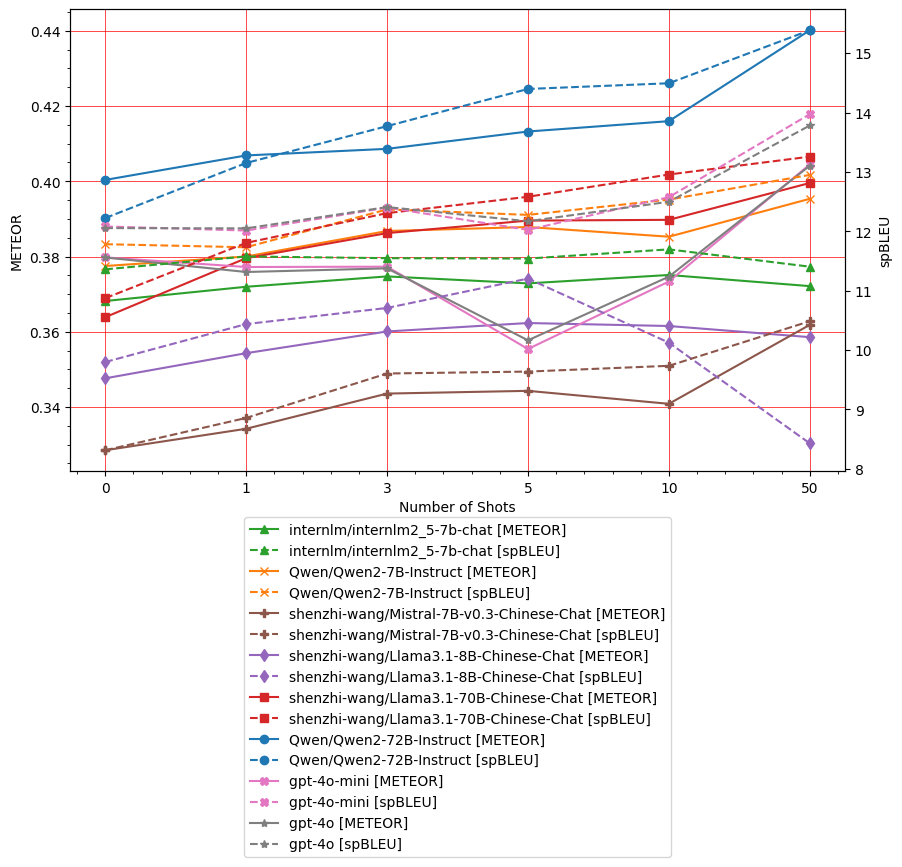

In [164]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

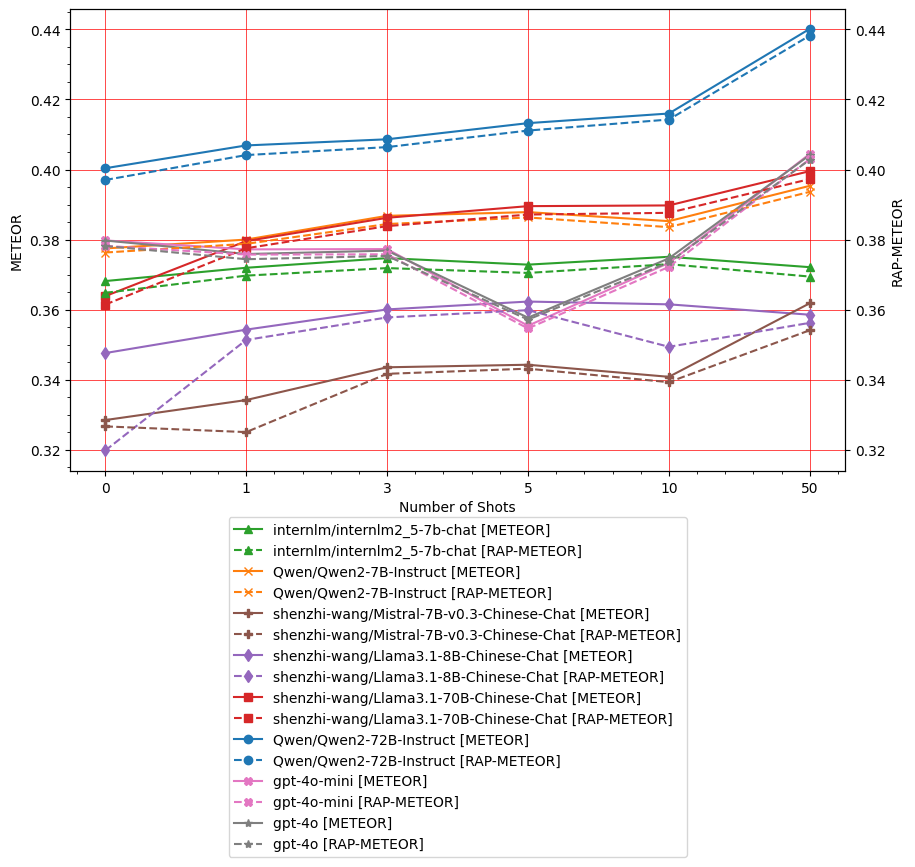

In [165]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

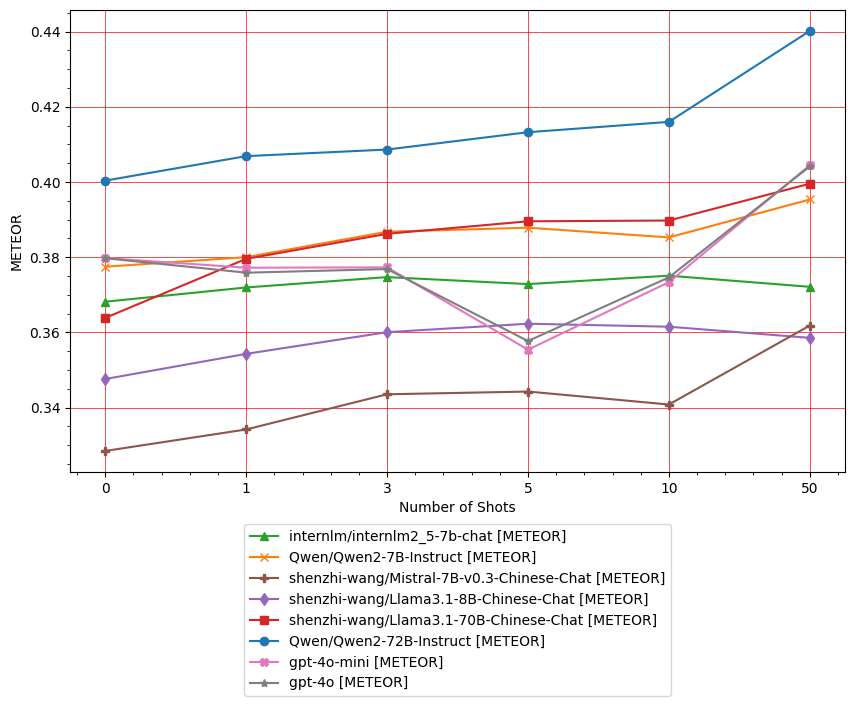

In [166]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

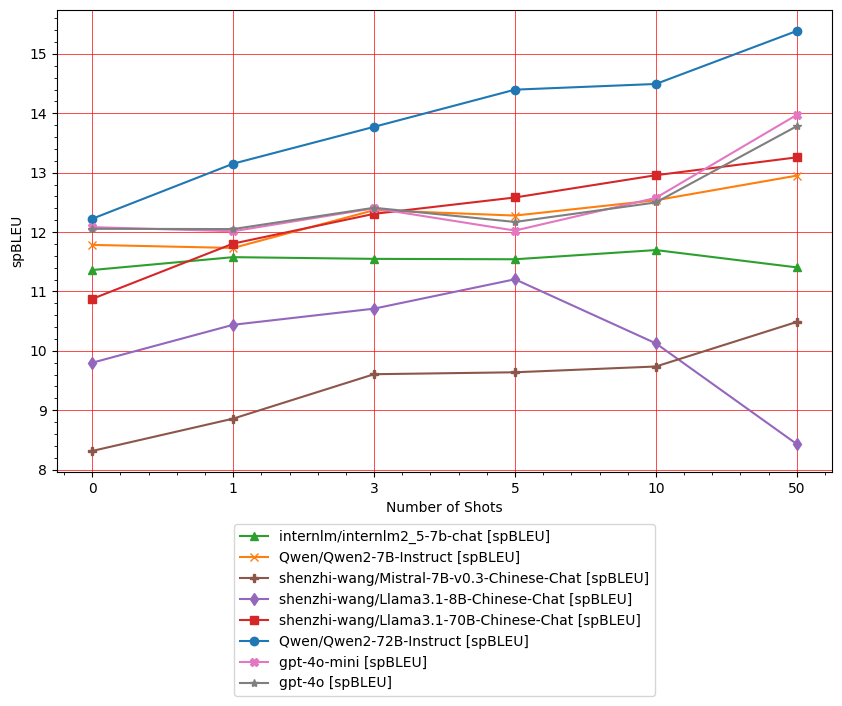

In [167]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

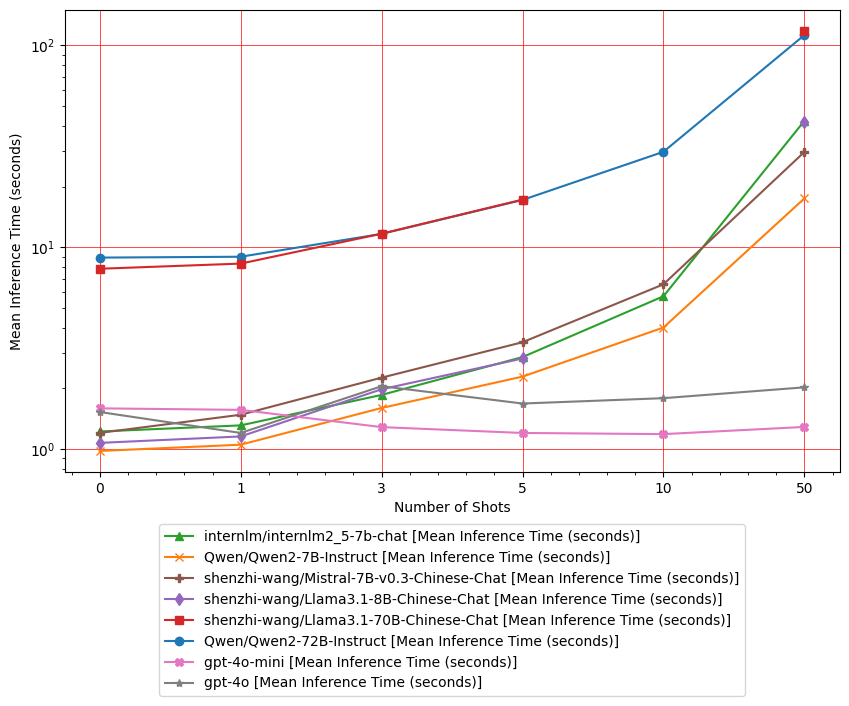

In [168]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    [True]
)

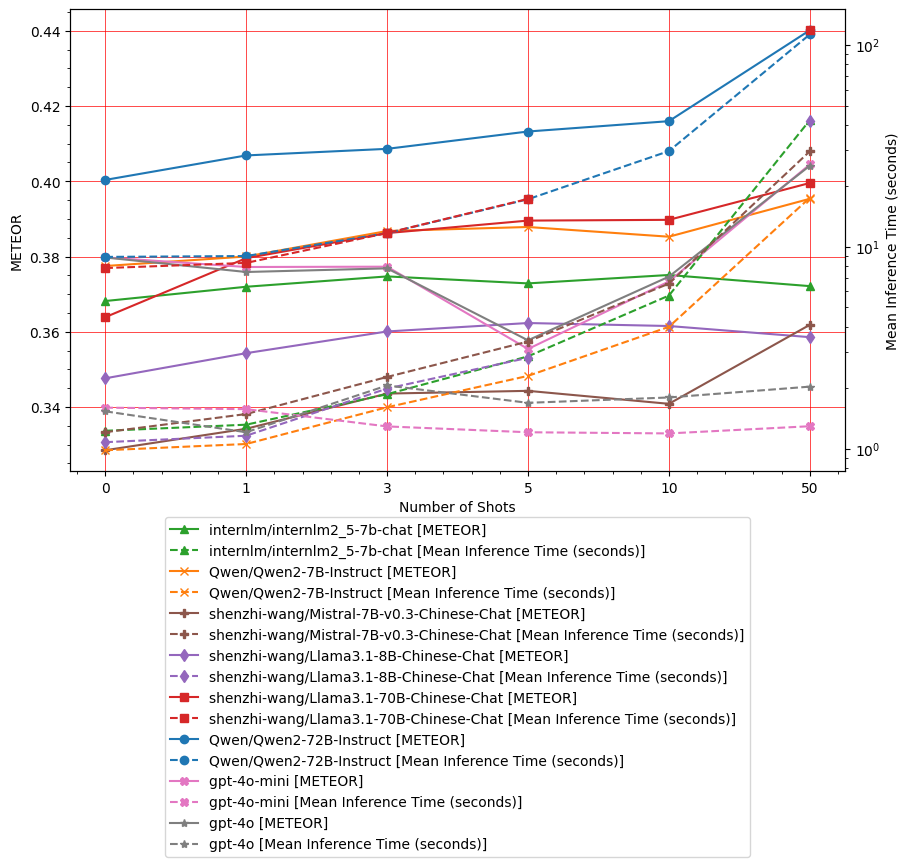

In [169]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    [False, True]
)

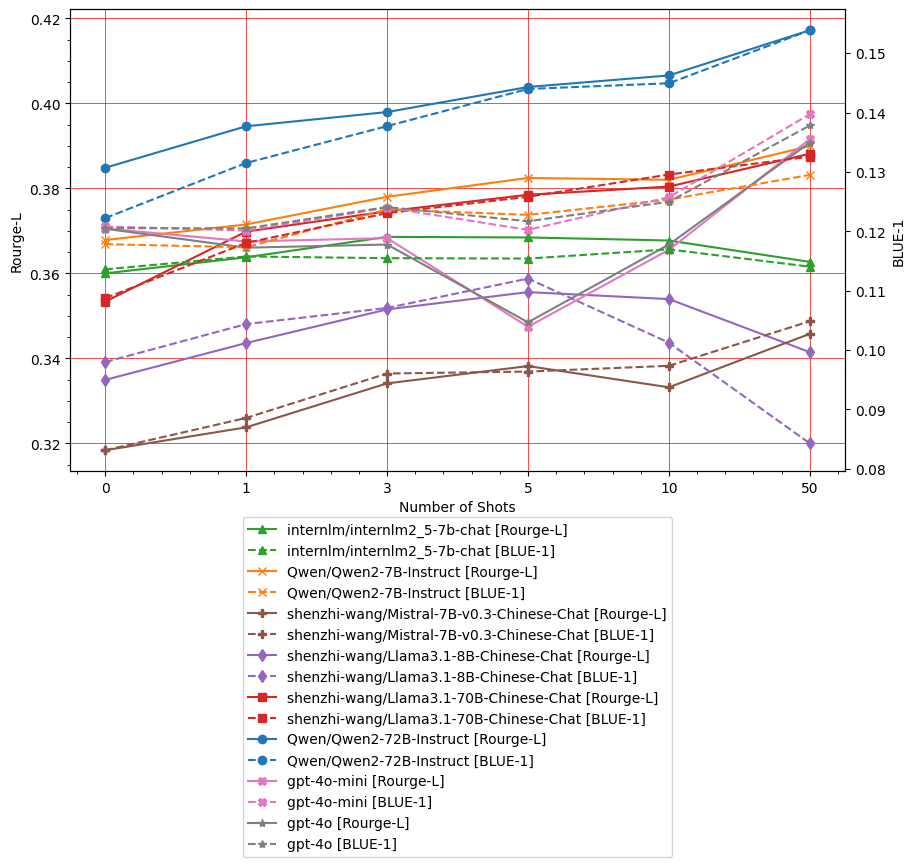

In [170]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

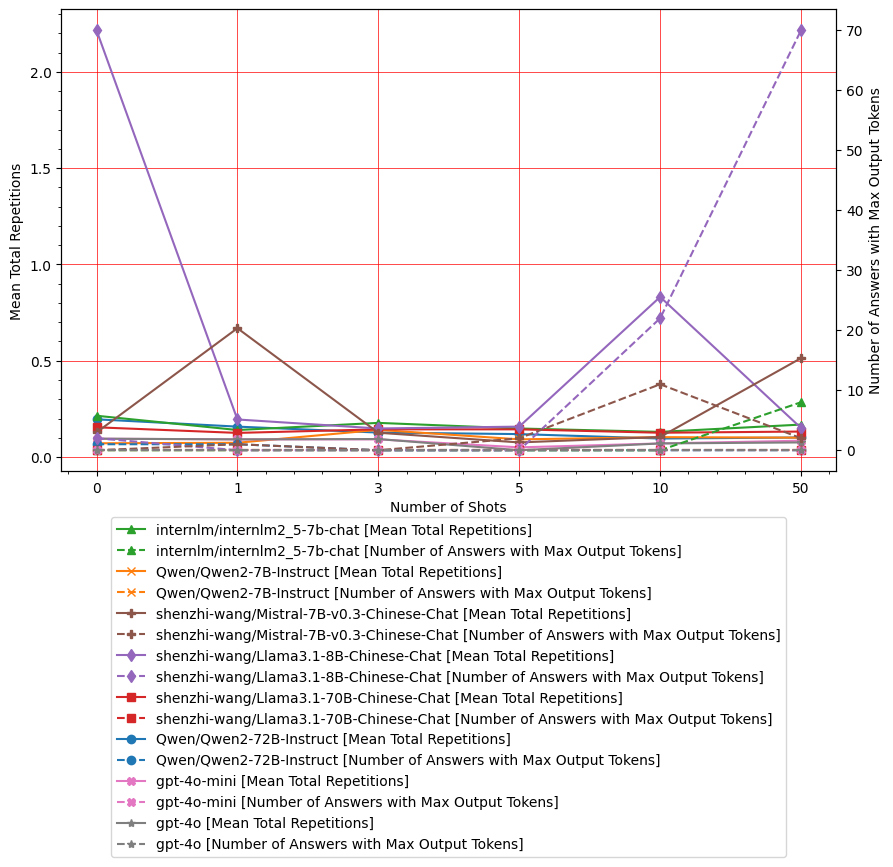

In [171]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

In [172]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/shots-00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/shots-00

*** Found 1 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/shots-00
--------------------------------------------------
chinese: 话都说得有些不搭调，可也是借酒吐真言，放了平时则是难出口的。
--------------------------------------------------
english: Her words were inappropriate to the occasion; obviously, alcohol was bringing out some hidden truths.
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/shots-00: Though his words were somewhat incoherent, he was speaking the truth by借助the aid of alcohol, which would be hard to utter under normal circumstances. 

Note: "借酒吐真言" is a Chinese idiom that means "to speak the truth with the aid of alcohol". However, since the instruction is not to provide additional sentences, I have included the translation of the idiom in brackets. If you prefer not to have this, the sentence would be: 

Though his words were s

In [173]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [174]:
metrics_df.describe()

shots     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  48.000000  48.000000  48.000000  48.000000  48.000000       48.0   
mean   11.500000   0.376574  11.820037   0.118200   0.366835        0.0   
std    17.704429   0.022529   1.527372   0.015274   0.021711        0.0   
min     0.000000   0.328500   8.313795   0.083138   0.318374        0.0   
25%     1.000000   0.361763  11.122221   0.111222   0.352903        0.0   
50%     4.000000   0.376369  12.037253   0.120373   0.367797        0.0   
75%    10.000000   0.388274  12.545441   0.125454   0.380827        0.0   
max    50.000000   0.440154  15.386349   0.153863   0.417229        0.0   

       repetition_score  total_repetitions        rap  \
count         48.000000          48.000000  48.000000   
mean           0.196878           0.196878   0.373625   
std            0.330749           0.330749   0.024016   
min            0.035305           0.035305   0.319818   
25%            0.091792           0.091792   0.357635   
50%            0.126214           0.126214   0.374867   
75%            0.151809           0.151809   0.386523   
max            2.216240           2.216240   0.438232   

       num_incomplete_translations  num_max_output_tokens   eval_time  
count                    48.000000              48.000000   46.000000  
mean                     36.895833               2.500000   11.880502  
std                      31.992845              10.603091   24.508174  
min                       8.000000               0.000000    0.980583  
25%                      16.750000               0.000000    1.354810  
50%                      22.000000               0.000000    2.157105  
75%                      44.250000               0.000000    8.961165  
max                     137.000000              70.000000  117.984113